# Intro To Scikit-learn

Normal workflow:

1. Get Data Ready
2. Pick a model that suits the problem
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload the trained model

In [52]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## 0. Quick Preview of Entire Workflow!

### 1. Get the Data Ready

In [53]:
# Import data and see what it looks like
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
# We want to have the model guess `target` is 1 or 0, so we need variables
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

### 2. Pick a model and hyperparameters that fit the problem

In [55]:
# Import classification model from sklearn
from sklearn.ensemble import RandomForestClassifier # Can classify data (1 or 0)
clf = RandomForestClassifier() # clf = classifier 

## Keep default hyperparameters
clf.get_params() # see model's hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3. Fit the model to the data


In [56]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

# Split X (features) and y (labels) into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_size is % of rows that go into test set

In [57]:
# Tell sklearn to fit to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
# Make a predictions on the test set
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

### 4. Evaluate the Model

In [59]:
# How well has model predicted data on the training set?
clf.score(X_train, y_train) # 1.0 makes sense because it was trained on this data

1.0

In [60]:
# How well has the model predicted data on the test set?
clf.score(X_test, y_test) # output should probably be different from training predictions

0.8032786885245902

In [61]:
# Use some other measure to check the model's accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [62]:
# Confusion Matrix
confusion_matrix(y_test, y_preds)

array([[20,  7],
       [ 5, 29]], dtype=int64)

In [63]:
# Accuracy Score
accuracy_score(y_test, y_preds)

0.8032786885245902

### 5. Improve the Model

Models can be improved by experimenting with tuning the hyperparameters

In [64]:
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model Accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model Accuracy on test set: 83.61%

Trying model with 20 estimators...
Model Accuracy on test set: 83.61%

Trying model with 30 estimators...
Model Accuracy on test set: 81.97%

Trying model with 40 estimators...
Model Accuracy on test set: 85.25%

Trying model with 50 estimators...
Model Accuracy on test set: 80.33%

Trying model with 60 estimators...
Model Accuracy on test set: 83.61%

Trying model with 70 estimators...
Model Accuracy on test set: 81.97%

Trying model with 80 estimators...
Model Accuracy on test set: 83.61%

Trying model with 90 estimators...
Model Accuracy on test set: 83.61%



### 6. Save and Load Models
Use Python's pickle library

In [65]:
import pickle

### Save the Model

In [66]:
# Dump saves the model
# pass in the instantiated sklearn model object
# "wb" means write binary, or write the file contents
pickle.dump(clf, open("models/heart-disease-random-forest.pkl", "wb"))

### Load a Model

In [67]:
# "rb" means read binary
loaded_model = pickle.load(open("models/heart-disease-random-forest.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8360655737704918

---

# In-Depth Sections

---

## 1. Getting the Data Ready
---

For the below steps, it's important to **run data transformations separately for training and testing sets**

Three main things to do:
- Split the data into features and labels (usually `X` and `y`)
- Split data into training and test sets (maybe 20% of data in test set)
- Filling (also called **imputing**) or disregarding missing values
- Converting non-numerical values to numerical values (AKA **feature encoding**)
- (Optional) Reduce the amount of data you use in the model
  - Also called **Dimensionality** reduction or column reduction
  - This can help save compute time and money by getting rid of data that might not be useful
- (Optional) **Feature Scaling** to make sure all the data is on the same scale so the ML model can find patterns. There are two main ways of doing this:
  - **Normalization (min-max scaling)**: Rescales all numerical values to be between 0 and 1. Scikit-learn has a library for this in the [MinMaxScalar class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
  - **Standardization**: Subtracts the mean value from all features and then scales them by unit variance. Scikit-learn has a library for this in the [StandardScalar class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
  - Feature Scaling usually isn't required for your target variable
  - Feature scaling is not usually required with tree-based models (random forest) since they can handle varying features

In [68]:
# Still have this imported
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1.1 - Split into Features and Labels

In [69]:
# Features do not include `target` column, which is whether or not the person has heart disease
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [70]:
# Label is the 'target' column
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [71]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Check shapes of data sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.2 - Convert All Data to Be Numeric



In [72]:
# Need data that has non-numeric data so we can practice changing it
car_sales = pd.read_csv("data/car-sales-extended.csv")
len(car_sales), car_sales.head()

(1000,
      Make Colour  Odometer (KM)  Doors  Price
 0   Honda  White          35431      4  15323
 1     BMW   Blue         192714      5  19943
 2   Honda  White          84714      4  28343
 3  Toyota  White         154365      4  13434
 4  Nissan   Blue         181577      3  14043)

In [73]:
# See that data is not in all numerics
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [74]:
# Turn the non-numeric categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate into X (features) and y (labels)
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Prepare which features in your data are categorical and need to be transformed
# Note: "Doors" is categorical because you could split the data into groups by # of doors
categorical_features = ["Make", "Colour", "Doors"]

# Setup OneHotEncoder (see explanation below)
one_hot = OneHotEncoder()

# Setup transformer
# Tell it to use "one_hot" method with the one_hot object we created, and use it on the categorical_features we created
# Tell it to "passthrough" (skip, not tranform) columns that are already numeric
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

# Fit tranformed data
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

#### One Hot Encoder

One Hot Encoder takes a single column that has categorical data in it, creates a new column for each unique category, and puts the data back into the data with a 1 in the unique column where it has a matching category. Here's an example graphic:

![](../images/one-hot-encoder.png)

In [75]:
# See transformed data in Pandas DataFrame
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


#### Another Way to Convert with Pandas

This might not work on categorical data that is already in the form of numbers (like Doors in our example), but pandas does more intelligently name the columns so you can see what OneHotEncoding is doing

In [76]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [77]:
# Try to fit the model with converted data
np.random.seed(24)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# Build and train model to predict car price
from sklearn.ensemble import RandomForestRegressor # Can predict a number (regression line)
model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.2364711420373471

### 1.3 - Handle Missing Values in Data

Two main ways to deal with missing values:
1. Fill them with some other value (**imputation**)
2. Remove the samples with missing data

In [78]:
# Get some data that has missing values
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [79]:
# Pandas fills missing values with `NaN`, so we can check if any of those exist
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### 1.3.1 - Fill Missing Data With Values (Imputation)
Pandas has ways to do this

In [80]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column with mean of entire data set
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column (assumption that average car has 4 doors)
car_sales_missing["Doors"].fillna(4, inplace=True)

# Check dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

#### 1.3.2 Remove Missing Data Rows

In [81]:
# Remove rows with NaN values
# At this point there are only Price values missing. Since that's the target label, we don't
# necessarily want to try to fill it with other data
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [82]:
# Resplit the data now that NaN values are gone
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Turn the non-numeric categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Prepare which features in your data are categorical and need to be transformed
# Note: "Doors" is categorical because you could split the data into groups by # of doors
categorical_features = ["Make", "Colour", "Doors"]

# Setup OneHotEncoder (see explanation below)
one_hot = OneHotEncoder()

# Setup transformer
# Tell it to use "one_hot" method with the one_hot object we created, and use it on the categorical_features we created
# Tell it to "passthrough" (skip, not tranform) columns that are already numeric
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

# Fit tranformed data
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### 1.3.2 Filling Missing Values With Only Scikit-learn

In [83]:
# Reimport data so we have the missing values
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head(), car_sales_missing.isna().sum()

(     Make Colour  Odometer (KM)  Doors    Price
 0   Honda  White        35431.0    4.0  15323.0
 1     BMW   Blue       192714.0    5.0  19943.0
 2   Honda  White        84714.0    4.0  28343.0
 3  Toyota  White       154365.0    4.0  13434.0
 4  Nissan   Blue       181577.0    3.0  14043.0,
 Make             49
 Colour           50
 Odometer (KM)    50
 Doors            50
 Price            50
 dtype: int64)

In [84]:
# Remove rows that are missing "Price" since that's our target label and we don't want to guess at that
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [85]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [86]:
# Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
# Create imputer object with "constant" (always same) strategy and the value to fill it with
categorical_imputer = SimpleImputer(strategy="constant", fill_value="missing")

# "Doors" label is categorical but technically stored as numerical, so we make a special imputer for it
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

# Create an imputer to fill the missing numerical values with the mean
num_imputer = SimpleImputer(strategy="mean")

# Define column names
categorical_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer to fill the missing values
# ColumnTransformer takes 3-tuples of imputer name, imputer object, column names
imputer = ColumnTransformer([
    ("categorical_imputer", categorical_imputer, categorical_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Tranform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [87]:
# Check that all values were filled by putting it into a Pandas DataFrame
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head(), car_sales_filled.isna().sum()

(     Make Colour Doors Odometer (KM)
 0   Honda  White   4.0       35431.0
 1     BMW   Blue   5.0      192714.0
 2   Honda  White   4.0       84714.0
 3  Toyota  White   4.0      154365.0
 4  Nissan   Blue   3.0      181577.0,
 Make             0
 Colour           0
 Doors            0
 Odometer (KM)    0
 dtype: int64)

In [88]:
# Turn the non-numeric categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Prepare which features in your data are categorical and need to be transformed
# Note: "Doors" is categorical because you could split the data into groups by # of doors
categorical_features = ["Make", "Colour", "Doors"]

# Setup OneHotEncoder (see explanation below)
one_hot = OneHotEncoder()

# Setup transformer
# Tell it to use "one_hot" method with the one_hot object we created, and use it on the categorical_features we created
# Tell it to "passthrough" (skip, not tranform) columns that are already numeric
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

# Fit tranformed data
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [89]:
# Now we have the data as all numbers and with filled values
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Choosing the Right Estimator/Algorithm For Your Problem
---

Some things to note:
- SKlearn refers to machine learning models and algorithms as **estimators**
- Classification problem - predicting a category (hearth disease or not)
  - Sometimes you'll see `clf` (short for classifier) used as a classification estimator
- Regression Problem - predicting a number (selling price of a car)

[SKlearn has a map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) of what kind of model you should maybe look at using:
![](../images/ml_map.png)

**NOTE** - Some generalized tips:

1. If you have structured (tabled) data, use Ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

### 2.1 - Picking a Machine Learning Model for a Regression Problem

Using the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

In [90]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [91]:
# Turn into Pandas DataFrame so it's easier to visualize
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [92]:
# Add target column onto dataframe
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [93]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model 
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model on (on the test set)
model.score(X_test, y_test)

0.5758549611440128

What if `Ridge` didn't work or didn't fit our needs?

We can try a different model from the scikit-learn algorithm map

Let's try an [Ensemble Model](https://scikit-learn.org/stable/modules/ensemble.html) (combination of smaller models)

In [94]:
# Import the RandomForestRegressor from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model
model.score(X_test, y_test)

0.8065734772187598

### 2.2 Picking a Machine Learning Model on a Classification Data Set

In [95]:
# Get a classification problem data set
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map says to try `LinearSVC`, so let's do it

In [96]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

D:\Repos\ml-ds\learning-projects\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

Let's try RandomForestClassifier as well

In [97]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
model.score(X_test, y_test)

0.8524590163934426

## 3. Fit the Model to the Data and Make Predictions
---

### 3.1 - Fitting the Model to the Data

Different names for:
- X = features, feature variables, data
- y = labels, targets, target variables

In [98]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model to the data (training ML model)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the ML model has found)
model.score(X_test, y_test)

0.8524590163934426

### 3.2 - Making Predictions With ML Model

Two main ways to make predictions:
- predict()
- predict_proba()

#### 3.2.1 `Using predict()`

In [99]:
# Use a trained model to make predictions
model.predict(np.array[1, 7, 8, 3, 4]) # this doesn't work because the array doesn't match the data the model trained on

TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
X_test.head(), X_test.shape

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 179   57    1   0       150   276    0        0      112      1      0.6   
 228   59    1   3       170   288    0        0      159      0      0.2   
 111   57    1   2       150   126    1        1      173      0      0.2   
 246   56    0   0       134   409    0        0      150      1      1.9   
 60    71    0   2       110   265    1        0      130      0      0.0   
 
      slope  ca  thal  
 179      1   1     1  
 228      1   0     3  
 111      2   1     3  
 246      1   2     3  
 60       2   1     2  ,
 (61, 13))

In [ ]:
# Make predictions from test split
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
# Actual test labels
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [ ]:
# That comparison is the same as the built-in score function
model.score(X_test, y_test)

0.8524590163934426

In [ ]:
# Another way to do it
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

#### 3.2.2 Using `predict_proba()`
`predict_proba()` returns probabilities of a classification label

In the example of the heart disease data we're using, the two classes are 0 (does not have heart disease) and 1 (has heart disease)

In [ ]:
# See what it puts out
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
# Let's predict() on the same data
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

The above outputs are showing that the first five rows were put into the following classes with a certain probability. Index 0 was classified as 0 (no heart disease) with 89% probability of being correct and 11% of being wrong

You can see that `predict_proba()` to see which predictions the model was very confident in and which it wasn't. Using `predict()` forces the model to make a classification prediction, but it could only be 51% probable and that might be something to look at

`predict()` can also be used on Regression data. It'll make a prediction of a numerical value that you can compare to the test data. See below for an example

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [ ]:
# Compare predictions to actual values
y_preds[:10], np.array(y_test[:10])

(array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
        2.34323  , 1.66182  , 2.47489  , 4.8344779]),
 array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  ]))

In [ ]:
# Statistical Evaluation of predictions compared to truth
# Using Mean Absolute Error (average amount +/- the prediction was off the truth)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

## 4. Evaluate the Model
---

There are 3 main ways to evaluate a Scikit-learn model/estimator:
- Estimator's built-in `score()` method
  - For Classification problems, `score()` gives a percent accuracy
  - For Regression problems, `score()` returns the Coefficient of Determination (r-squared)
- The `scoring` parameter
- Problem-specific metric functions

Read more about them [here](https://scikit-learn.org/stable/modules/model_evaluation.html)

### 4.1 Evaluation With `score()`

In [ ]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model to the data (training ML model)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the ML model has found)
model.score(X_test, y_test)

0.8524590163934426

In [ ]:
# See score on training data (expecting 1.0 since it saw the data)
model.score(X_train, y_train)

1.0

### 4.2 Evaluation With `scoring` Parameter

#### Cross Validation

Cross Validation trains the model multiple times with different groups of train/test splits. In Scikit-learn, it defaults to using 5 different versions. This is `5-Fold Cross Validation`, but generalizing the concept is referred to as `k-Fold Cross Validation`

![](../images/sklearn-cross-validation.png)

Cross validation is a good way to check and make sure that your model is accurate and not just getting lucky with some really good train/test data. It can be a good measure to see how your model will react to real-world data

In [ ]:
from sklearn.model_selection import cross_val_score # import cross validation
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8524590163934426

In [ ]:
# Show cross validation scores (default is 5, can adjust with cv=#)
cross_val_score(model, X, y, cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [ ]:
np.random.seed(42)

# Single training and test split score
model_single_score = model.score(X_test, y_test)

# Take the mean of 5-fold cross-validation scores
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

# Compare the scores
model_single_score, model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Evaluating a model with Cross Validation and Scoring Parameter
# Scoring parameter set to None by default. It will use the passed model's default scoring parameter
np.random.seed(42)
cross_val_score(model, X, y, cv=5, scoring=None) # could do something like scoring="precision" or "recall", etc.

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
print(f"The cross-validated precision is {model_cross_val_score}%")

The cross-validated precision is 0.8248087431693989%


### 4.3 Classification Model Evaluation Metrics

1. Accuracy
2. Area Under ROC Curve
3. Confusion Matrix
4. Classification Report

#### 4.3.1 Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cvs = cross_val_score(clf, X, y, cv=5)


In [ ]:
np.mean(cvs)

0.8248087431693989

In [ ]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cvs) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### 4.3.2 Area Under ROC (Receiver Operating Characteristic) Curve

Also sometimes referred to as AUC (area under curve). ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

**True positive**: Model predicts 1 when truth is 1

**False Positive**: Model predicts 1 when truth is 0

**True Negative**: Model predicts 0 when truth is 0

**False Negative**: Model predicts 0 when truth is 1

In [ ]:
# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# Fit Classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.58, 0.42],
        [0.09, 0.91],
        [0.55, 0.45],
        [0.75, 0.25],
        [0.52, 0.48],
        [0.09, 0.91],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.14, 0.86],
        [0.39, 0.61]]),
 61)

In [ ]:
y_probs_positive = y_probs[:, 1] # Get column 1 from every row
y_probs_positive[:10]

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61])

In [ ]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

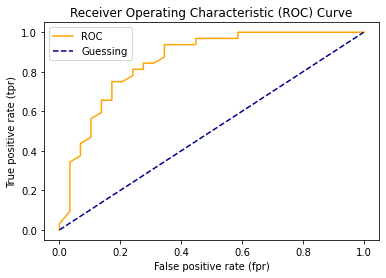

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots the ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # Plot line with noe predictive power
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8561422413793104

#### 4.3.3 Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict, giving you an idea about where the model is getting confused

In [ ]:
# Get initial confusion matrix values
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 8, 24]], dtype=int64)

In [ ]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,8,24


In [ ]:
# Install Seaborn (a Conda package) into the current Conda environment from the Jupyter Notebook
import sys
!conda install --yes --prefix  {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Repos\ml-ds\learning-projects\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.11.2             |     pyhd3eb1b0_0         218 KB
    ------------------------------------------------------------
                                           Total:         218 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.2-pyhd3eb1b0_0




seaborn-0.11.2       | 218 KB    |            |   0% 
seaborn-0.11.2       | 218 KB    | 7          |   7% 
seaborn-0.11.2       | 218 KB    | ########## | 100% 



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda





seaborn-0.11.2       | 218 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


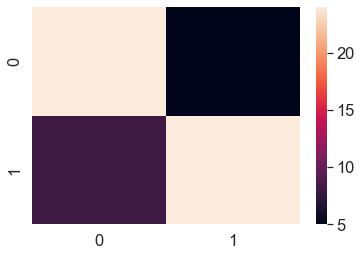

In [ ]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

##### Confusion Matrix with Built-In Scikit-Learn 1.0
There is new functionality to display a confusion matrix built into Scikit-learn 1.0, so let's see how to use it

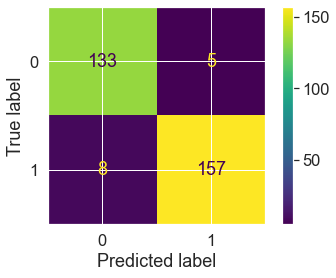

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

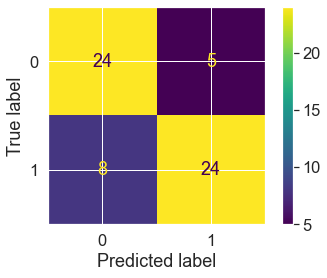

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

#### 4.3.4 Classification Report

It's called a report because it reports multiple metrics

**Precision**: Indicates the proportion of positive classifications which were actually correct

**Recall**: Indicates the proportion of actual positives which were correctly predicted

**F1 Score**: A combination of precision and recall

**Support**: The number of samples each metric was calculated on

**Accuracy**: The accuracy of the model in decimal form

**Macro avg**: Average precision, recall, and F1 score between classes. This doesn't imbalance into effort, so pay attention if you have class imbalances
  - Class imbalance referring to large differences in the number of samples in each classification

**Weighted avg**: Weighted (with respect to how many samples are in each) average of precision, recall, and F1 score between classes.

In [ ]:
# Evalute model with Scikit-learn imported functions
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
# Where precision and recall become valuable
# Disease where 1/10,000 have it, build model to predict it
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

D:\Repos\ml-ds\learning-projects\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Repos\ml-ds\learning-projects\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Repos\ml-ds\learning-projects\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.4 Regression Model Evaluation Metrics

1. R^2 (r-squared) Score or Coefficient of Determination
   1. Similar to accuracy. Gives a quick indication, but doesn't show how wrong the model is for each incorrect prediction
2. Mean Absolute Error (MAE)
   1. Gives better indication of how far off each prediction is on average
3. Mean Squared Error (MSE)
   1. Similar to MAE, but since it's squared it amplifies large differences. If MAE is 200 and MSE is 200, the MSE 200 is indicating a much larger difference

In [ ]:
# Setup data for regression model exploration
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

#### 4.4.1 R Squared Score

The proportion of the variation in the dependent variable that is predictable from the independent variable

In [ ]:
# Since RandomForestRegressor is a regression model, its default score() returns r2
model.score(X_test, y_test)

0.8065734772187598

In [ ]:
# Another way using the r2_score metric function
from sklearn.metrics import r2_score

# Get predictions
y_preds = model.predict(X_test)

r2_score(y_true=y_test, y_pred=y_preds)

0.8065734772187598

#### 4.4.2 Mean Absolute Error (MAE)

Average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your model's predictions are

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [ ]:
# Visualize what MAE means
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})

df["differences"] = np.abs(df["predicted values"] - df["actual values"])

df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,0.925110
5723,4.46600,4.834478,0.368478


In [ ]:
# Show that MAE is the mean of the absolute value of the differences
df["differences"].mean()

0.32659871732073803

#### 4.4.3 Mean Squared Error (MSE)

Mean of the square of the errors between actual and predicted values

In [ ]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [ ]:
# Visualize
df["squared differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,0.448240,0.200919


In [ ]:
# Calculated by hand
squared = np.square(df["differences"])
squared.mean()

0.25346785208245565

## 5. Improving a Machine Learning Model (Experimentation)
---

When tuning hyperparameters, a new data split is used. Splits will look like:
- Training split (70-80%)
- Validation split (10-15%). These are used to tune hyperparameters
- Testing split (10-15%)

First predictions on a model are called **baseline predictions**. The first model you've made is called a **baseline model**.

Ways to improve model from Data perspective:
- Can we collect more data?
- Can we improve our data? (more features, better features)

Ways to improve model from the model's perspective:
- Is there a better model we could use?
- Could we improve the current model? (tuning hyperparameters)

**Parameters**: a ML model finds parameter patterns in the data

**Hyperparameters**: settings on the ML model that the user can adjust to (potentially) improve its ability to find parameters

Three ways to adjust Hyperparameters:
- By Hand
- Randomly with RandomSearchCV
- Exhaustively with GridSearchCV

In [ ]:
# Setup Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# List model's Hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters By Hand

Make training, validation, and test splits

In [ ]:
# See hyperparameters again
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Try adjusting the following:
- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimators`

In [101]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make a reusable evaluation function to use on classification data
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels
    on a classification model
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}

    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return metric_dict

In [114]:
# Setup model and data
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1) # shuffle all data

# Separate into labels and targets
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Manually split data into train, validation, test splits
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 Score: 0.85


In [ ]:
# Adjust Hyperparameters by hand on a different classifier
np.random.seed(42)

clf2 = RandomForestClassifier(n_estimators=10) # tuned hyperparemeter
clf2.fit(X_train, y_train)
y_preds = clf2.predict(X_valid)
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


In [115]:
# Adjust Hyperparameters by hand on a third classifier
np.random.seed(42)

clf3 = RandomForestClassifier(n_estimators=100, max_depth=8) # tuned hyperparameters
clf3.fit(X_train, y_train)
y_preds = clf3.predict(X_valid)
clf3_metrics = evaluate_preds(y_valid, y_preds)

Acc: 84.44%
Precision: 0.85
Recall: 0.88
F1 Score: 0.86


### 5.2 Hyperparameter Tuning with RandomizedSearchCV

In [103]:
# Import function
from sklearn.model_selection import RandomizedSearchCV

# Create dictionary mapping hyperparameter name to values you'd like to try
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X (labels) and y (targets)
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model
clf = RandomForestClassifier(n_jobs=1) # n_jobs tells computer how much CPU resource to dedicate to training model. Default is 'None'

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,              # Estimator object
                            param_distributions=grid,   # Dictionary of hyperparams and values to test
                            n_iter=10,                  # Number of models to try with random choices of hyperparameters values from dictionary
                            cv=5,                       # 5-fold cross validation
                            verbose=2)                  

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [104]:
# Check the best chosen parameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [105]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 Score: 0.81


### 5.3 Tuning Hyperparameters With GridSearchCV

The difference between `GridSearchCV` and `RandomizedSearchCV` is that GridSearchCV will go through every possible combination of hyperparameters in the grid you've setup. It's kind of like a brute force method

In [106]:
# See grid of hyperparameters and values
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [107]:
# Reduce the search space of hyperparameters by only keeping values that are "close" to
# what RandomizedSearchCV found to be the best ones
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [109]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X (labels) and y (targets)
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model
clf = RandomForestClassifier(n_jobs=1) # n_jobs tells computer how much CPU resource to dedicate to training model. Default is 'None'

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,              # Estimator object
                      param_grid=grid_2,          # Dictionary of hyperparams and values to test
                      cv=5,                       # 5-fold cross validation
                      verbose=2)                  

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [110]:
# See best hyperparameters
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [111]:
# Make predictions with model found by GridSearchCV
gs_y_preds = gs_clf.predict(X_test)

# Evaluate predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


Compare the different models' metrics

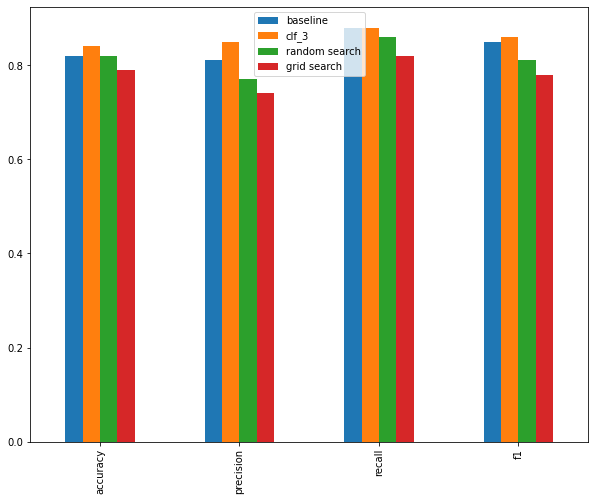

In [116]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_3": clf3_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

## 6. Save and Load a Model
---

Two ways to save and load machine learning models:
1. Python's `pickle` module
2. The `joblib` module (may be better for fitted scikit-learn models)

### 6.1 Pickle

In [117]:
import pickle

# Save an existing model to file
pickle.dump(clf3, open("models/tuned_random_forest_model_1.pkl", "wb"))

In [125]:
np.random.seed(42)

# Load a saved model
loaded_pickle_model = pickle.load(open("models/tuned_random_forest_model_1.pkl", "rb"))

# Reset data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Make some predictions with the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 95.08%
Precision: 0.96
Recall: 0.93
F1 Score: 0.95


{'accuracy': 0.95, 'precision': 0.96, 'recall': 0.93, 'f1': 0.95}

### 6.2 Joblib

In [126]:
from joblib import dump, load

# Save model to a file
dump(gs_clf, filename="models/tuned_random_forest_model_2.joblib")

['models/tuned_random_forest_model_2.joblib']

In [127]:
# Load a saved model
loaded_joblib_model = load(filename="models/tuned_random_forest_model_2.joblib")

# Make some predictions with the loaded model
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting It All Together
---

Running through a standard Scikit-learn workflow again, but also using Scikit-learn Pipeline

In [129]:
# Import data and peek at it
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.head(), data.dtypes

(     Make Colour  Odometer (KM)  Doors    Price
 0   Honda  White        35431.0    4.0  15323.0
 1     BMW   Blue       192714.0    5.0  19943.0
 2   Honda  White        84714.0    4.0  28343.0
 3  Toyota  White       154365.0    4.0  13434.0
 4  Nissan   Blue       181577.0    3.0  14043.0,
 Make              object
 Colour            object
 Odometer (KM)    float64
 Doors            float64
 Price            float64
 dtype: object)

In [130]:
# Check null values
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do:
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [131]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset={"Price"}, inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)
    ]
)

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [133]:
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV with our regression Pipeline
#
# The keys are drilling into steps of the Pipeline with __ separating different steps
# For example, preprocessor__num__imputer__strategy goes to the `preprocessor` step of
# the pipeline, goes to the `num` transformer step inside of that preprocessor, goes to 
# the `imputer`` step of that transformer, and then tries different strategies.
#
# The values are the different values of the step you want the GridSearchCV to try
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [134]:
gs_model.score(X_test, y_test)

0.3339554263158365